# Analyzing Borrowers’ Risk of Defaulting

This project's goal is to prepare a report for a bank’s loan division. The report will be considered when building the **credit score** of a potential customer. The **credit score** is used to evaluate the ability of a potential borrower to repay their loan. Initially, we were asked to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank has already collected and provided us with some data on customers’ credit worthiness.

# Contents <a id='back'></a>

* [Introduction](#intro)

* [Stage 1. Data Overview](#data_overview)
    * [General Information About the Data](#data_overview_general)
    * [Data Exploration](#data_overview_exploration)
    * [Intermediate Conclusions](#data_overview_conclusion)
* [Stage 2. Data Transformation](#data_transformation)
    * [Investigating and Filling In Missing Values](#missing_values)
    * [Intermediate conclusions on the nature of missing values](#missing_values_intermediate1)
    * [Further investigation of missing values: the role of customers' age](#missing_values_part2)
    * [Intermediate conclusions on the nature of missing values](#missing_values_intermediate2)
    * [Further investigation of missing values: the role of loan purpose](#missing_values_part3)
    * [Final conclusions on the nature of missing values](#missing_values_final)
    * [Working with duplicates in individual columns](#duplicates1)
    * [Working with duplicates across the dataset](#duplicates2)
    * [Intermediate conclusions on duplicates](#duplicates_intermediate)
    * [Restoring missing values in `total_income`](#restoring_missing_values1)
    * [Restoring values in `days_employed`](#restoring_missing_values2)
    * [Final check for missing values for the rest of the variables](#restoring_missing_values3)
    * [Data Categorization](#categories)
* [Stage 3. Testing Hypotheses](#hypotheses_testing)

    * [Hypothesis 1: merital status impact](#hypotheses_testing_family)
    * [Hypothesis 2: number of children impact](#hypotheses_testing_children)
    * [Hypothesis 3: income impact](#hypotheses_testing_income)
    * [Hypothesis 3*. number of children for different income levels](#hypotheses_testing_income_star)
    * [Hypothesis 4: purpose impact](#hypotheses_testing_purpose)
    * [Hypothesis 5: gender impact](#hypotheses_testing_gender)
    * [Hypothesis 6: work experience impact](#hypotheses_testing_exp)
    * [Hypothesis 7: education level impact](#hypotheses_testing_eduction)
    * [Hypothesis 8: age impact](#hypotheses_testing_age)
* [Stage 4. General Conclusion: Findings and Recommendations](#general_conclusions)

## Introduction <a id="intro"></a>

To make the right decisions on the structure of a future credit scoring model, a bank has to reveal sound assumptions with regard to customers' characteristics which have the most impact on the probability of a particular customer to payout the loan. To this purpose, we formulate a number of hypotheses that we will test on the existing data provided by the loan division of the bank.

### Goal: 
Based on their experience, the loan division suggested that the merital status and the number of children should have considerable impact. Thus, we will test these two initial hypotheses and add 3 to 5 more hypotheses to find out, based on already existing data, what customer's characteristics had the most impact on his or her credit worthiness and make recommendations for future credit score model. The list of hypotheses includes:
1. Marital status has an impact on whether the client will default on a loan (one of the initial assumption provided by the loan division). 
2. Number of children has an impact on whether the client will default on a loan (additional assumption provided by the loan division). 
3. Other variables (e.g., income level or loan purpose) and/or their combinations (e.g., income level to number of children ratio) have an impact on whether the client will default on a loan (we will elaborate on additional hypotheses after getting the results on the first two ones we were tasked with to check).

### Project Stages 
Data on customers’ credit worthiness in the file `/datasets/credit_scoring_eng.csv`. We were not provided with any previous information about the quality of the data, so we will explore it before testing the hypotheses. First, we evaluate the quality of the data and see how significant its issues are and what are appropriate ways to fix them. Then, during data preprocessing stage, we account for the most critical problems (identify and fill in missing values, cast data types according to the needs of the project, delete duplicate data and categorize the clean data to enable further hypotheses testing). The next stage is to test the initial hypotheses and additional ones accordingly. The last stage is making an overview of the findings and writing recommendations for the loan division. Thus, the project will consist of four stages:
 1. Data overview;
 2. Data preprocessing/transformation;
 3. Testing the hypotheses;
 4. Conclusion.
 
[Back to Contents](#back)

## Stage 1. Data Overview <a id='data_overview'></a>

### Opening of the data file and having a look at the general information  <a id='data_overview_general'></a>

We start with importing the necessary libraries and loading the data. If additional libraries are needed, we will add them to the next cell also and update it.

In [147]:
import pandas as pd
import matplotlib.pyplot as plt # We will need this for visualisations
%matplotlib inline
from scipy import stats # We will need this in case we want to make some statistical checks
import warnings
warnings.filterwarnings("ignore") # To filter out automatic comments on plots from Jupyter (not affecting the output)

Let's read the data. We wrap the file reading request into a try-except block to make sure that the project runs both locally and on the platform and check that the data set was uploaded.

In [148]:
try:
    df = pd.read_csv('datasets/credit_scoring_eng.csv')
except:
    df = pd.read_csv('/datasets/credit_scoring_eng.csv')

# checking that the file was read

df.head(1)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house


[Back to Contents](#back)

### Task 1. Data exploration <a id='data_overview_exploration'></a>

**Description of the data** (provided by the loan division)
- `children` - the number of children in the family
- `days_employed` - work experience in days
- `dob_years` - client's age in years
- `education` - client's education
- `education_id` - education identifier
- `family_status` - marital status
- `family_status_id` - marital status identifier
- `gender` - gender of the client
- `income_type` - type of employment
- `debt` - was there any debt on loan repayment
- `total_income` - monthly income
- `purpose` - the purpose of obtaining a loan


Let's see how many rows and columns our dataset has.

In [149]:
print('DataFrame length:', len(df))
print('DataFrame width:', len(df.columns))

DataFrame length: 21525
DataFrame width: 12


The data sample consist of **21525 rows and 12 columns** (described above). Let's print the first 15 rows.

In [150]:
df.head(15)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


One can immediately notice **a number of issues which need further investigation** down the road:
1. Negative values for days_employed variable (possibly just need a sign change); one value with impossible number of says to work
2. Implicit duplicates in education column (e.g. capital vs. small letters); we should check for other types of variability in the category names;
3. Potentially large spectrum of values (partly implicit duplicates as well) in purpose column (e.g., "housing transactions" vs. "purchase of the house" vs. "purchase of the house for my family"; another example "buy commercial real estate" by an employee vs. "buy real estate", by a business person.

Of course, additional issues can rise that may need further investigation and changes in the data set.

The data does not seem to have issues with column names, but let's make additional check on column names.

In [151]:
df.columns

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

Right, column names are OK: snake_case and lowercase are used, no spaces.

Let's get the info on the data.

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


The columns have proper data types. There is no missing data across all the columns, rather for the two columns concerning the work experience and total income. Let's show it in a more clear way, using `isna()` method.

In [153]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

The number of non null values suggests that those can be the same entries, for which the data are missing. Let's take a look at filtered data, first separatelly for each column, then for both columns.

In [154]:
# one column filter for days employed
df_days_employed_nan = df[df['days_employed'].isna()]
df_days_employed_nan.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding


In [155]:
# one column filter for total income
df_total_income_nan = df[df['total_income'].isna()]
df_total_income_nan.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding


So far, those seem to be the same data subsets. Let's apply multiple OR condition for filtering data and then multiple AND condition.

In [156]:
# combined OR filter on the two columns; we check either of the two conditions to catch all the rows with NaNs
df_union_nan = df[df['days_employed'].isna() | df['total_income'].isna()]
df_union_nan.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding


In [157]:
# combined AND filter on the two columns; we check both of the two conditions to catch the rows with both NaNs
df_intersection_nan = df[df['days_employed'].isna() & df['total_income'].isna()]
df_intersection_nan.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding


Now, let's compare the number of rows in the four filtered tables.

In [158]:
compare = {'days_employed_filter': [len(df_days_employed_nan)],
           'total_income_filter': [len(df_total_income_nan)],
           'union_filter': [len(df_union_nan)],
            'intersection_filter': len(df_intersection_nan)}
compare_df = pd.DataFrame(compare)
compare_df

,days_employed_filter,total_income_filter,union_filter,intersection_filter
0,2174,2174,2174,2174


We have the same count both for individual subsets, for their union, and for their intersection; thus, we can conclude that **there is a subset of 2174 entries which lack the values in days_employed and total_income columns**. Let's calculate the percentage of the missing values compared to the whole dataset.

In [159]:
print(f'Missing values comprise {len(df_union_nan)*100/len(df):.1f}% of the rows in the data set under consideration.')

Missing values comprise 10.1% of the rows in the data set under consideration.


[Back to Contents](#back)

### Task 2. Intermediate conclusions <a id='data_overview_conclusion'></a>

So far, we have seen that our data sample consist of 21525 rows and 12 columns. It did not have any specific issues with column names and the data types look to be appropriate. Three significant issues with the data quality have been revealed so far:
1. Negative values for days_employed variable and value(s) with what seems to be impossibly high number of days to work;
2. Implicit duplicates / variaty of options in education and purpose column;
3. 10% of the rows, which comprises a considerably large piece of data, miss values both in `days_employed` and in `total_income` columns.

We will consider these issues in the following order: we start with investigating the nature of the missing values, then we check for duplicates, explicit or implicit, and fix educational and purpose information if required, then we will have to make additional investigation on the values in days_employed and total_income columns, which we presumably have to perform before we can fill in the missing information, then we will get back to the missing values and fill them in, and finally, we will complete data categorization to support the further hypotheses testing.

In what follows, we proceed to investigating the nature of the missing values. To do that, we consider specific client characteristics and look for those which can explain the missing data. Our ultimate goal, at this step, is to find out whether the missing values are missing randomly or not and what are the possibilities to fill the missing data to ensure that we preserve as many data points as possible for further analysis.

[Back to Contents](#back)

## Stage 2. Data Transformation <a id='data_transformation'></a>

### Task 1. Working with missing values <a id='missing_values'></a>

Let's create two subsets, of NaN values and without NaN values, to compare the distributions of other variables between them.

In [160]:
# For investigating clients who do not have data in the columns with the missing values
df_nan = df[df['days_employed'].isna()]
df_nan.head(1)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding


In [161]:
# For investigating clients who have the full set of datadata in the columns with the missing values
df_nn = df.dropna(subset=['days_employed'])
df_nn.head(1)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house


We will investigate whether there are differences in the distributions of other variables for the two subsets.<font style='color:orange'>*</font> As a reminder, we put here the list of those variables with their description and note that these are categorical variables:
- `children` - the number of children in the family
- `dob_years` - client's age in years
- `education` - client's education
- `family_status` - marital status
- `gender` - gender of the client
- `income_type` - type of employment
- `debt` - was there any debt on loan repayment
- `purpose` - the purpose of obtaining a loan

<font style='color:orange'>*</font> As a side comment: in this project, we will not engage in researching statistical significance of the similarity of the distributions, assuming that the information we will extract from visual analysis will be sufficient for us to make practically meaningful conclusions.

We define a basic function for plotting pairs of distributions for categorical values:

In [162]:
# paired_plot() function plots horizontal frequency histogram for the same variable in two subsets.
"""
The function takes 4 position paramaters and 2 default parameters:
- df1 - first subset, DataFrame
- df2 - second subset, DataFrame
- column - the column for which the comparison is performed, string
- xlabel - a label for x axis, string
- df1_subtitle - df1 subplot title, string
- df2_subtitle - df2 subplot title, string.
Note: the function calculates normilized counts to account for different sizes of the data subsets
"""

def paired_plot(df1, df2, column, xlabel, df1_subtitle = 'Missing data subset', df2_subtitle = 'Complete data subset'):
    
    fig, axs = plt.subplots(2, 1, sharex = True, sharey = True, figsize = (6,6))
    
    (df1[column].value_counts(normalize=True)).plot(ax=axs[0],kind = 'barh') 
    (df2[column].value_counts(normalize=True)).plot(ax=axs[1], kind = 'barh')
    axs[0].set_title(df1_subtitle,size=8)
    axs[1].set_title(df2_subtitle,size=8)
    axs[0].set_ylabel(xlabel)
    axs[1].set_ylabel(xlabel)
    axs[1].set_xlabel('Frequency')
    fig.show()


Let's start from the `children` variable.

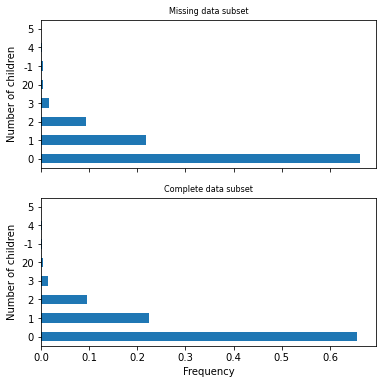

In [163]:
paired_plot(df_nan, df_nn, 'children', 'Number of children')

The distributions of the number of children are identical. Interestingly, there are cases of 20 children and -1 child. We will remember [<font style="color:red;">**TO CHECK**</font> them later](#children_bool). Meanwhile, we move to the `dob_years` variable.

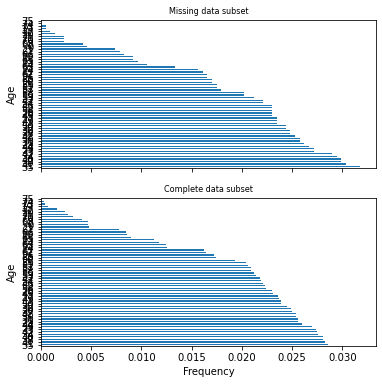

In [164]:
paired_plot(df_nan, df_nn, 'dob_years', 'Age')

While lacking bins, our custom plotting function is not perfect form of represenation of age values, so we will employ a better method further down the road, but we can already notice that the distributions of the age variable show some differences for the two subsets. Let's move on to `education`.

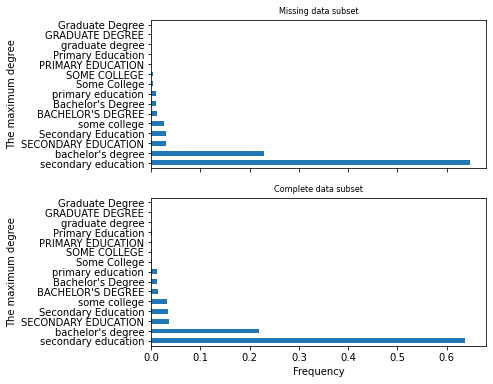

In [165]:
paired_plot(df_nan, df_nn, 'education', 'The maximum degree')

In the case of the education variable, we have similar distributions for both subsets, besides that the "complete data" subset has 3 additional education categories for graduate degree. It's worth noting, that it seems we have 5 categories of education with 3 name options for each of it.  We will remember [<font style="color:red;">**TO RENAME**</font> them later](#duplicates1). Meanwhile, we move to the `family_status` variable.

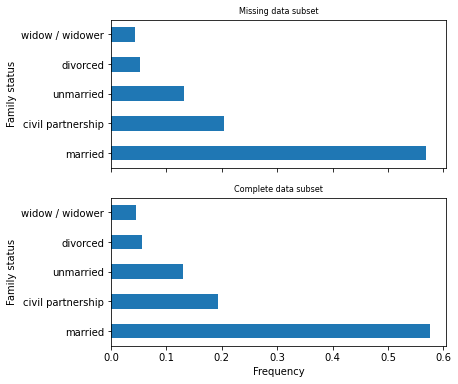

In [166]:
paired_plot(df_nan, df_nn, 'family_status', 'Family status')

In the case of the family status variable, we have similar distributions for both subsets. The next variable is `gender`.

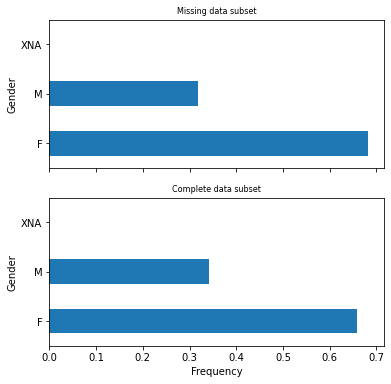

In [167]:
paired_plot(df_nan, df_nn, 'gender', 'Gender')

In the case of the gender variable, we have similar distributions as well, besides that there are some cases of XNA category for the "complete" data subset. We move to the `income_type` variable.

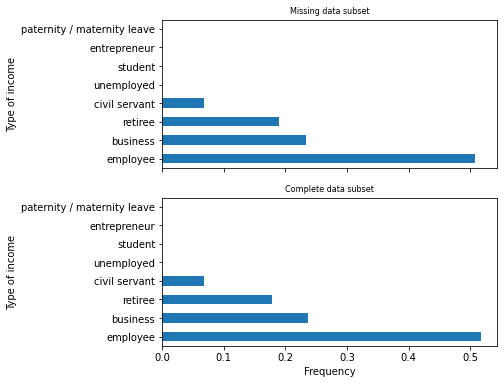

In [168]:
paired_plot(df_nan, df_nn, 'income_type', 'Type of income')

In the case of income category, we can see that both distributions are similar, besides a sligthly higher share of employees and some small amount of cases for categories like unemployed, students and a persone on maternity / paternity leave in the "complete" data subset. Interestingly, there is a category called entrepreneuer, which sounds to have the same meaning as "business". We will remember [<font style="color:red;">**TO CHECK AND RENAME**</font> them later](#income_type_rename). Meanwhile, we move to the `debt` variable, which shows whether the customer has any debt on loan repayment.

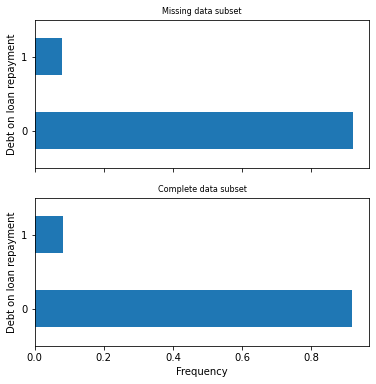

In [169]:
paired_plot(df_nan, df_nn, 'debt', 'Debt on loan repayment')

In this case, we have similar distributions as well, without any visible exceptions. Let's check the last available variable, `purpose`.

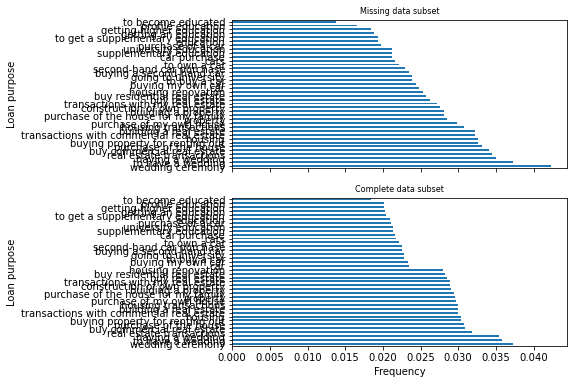

In [170]:
paired_plot(df_nan, df_nn, 'purpose', 'Loan purpose')

Similar to age, the `purpose` variable has too many categories in order our custom plotting function would be effective in showing exact details; nevertheless, we can definitely notice that the distributions are different for the two subsets.

[Back to Contents](#back)

### Task 2. Intermediate conclusions on the nature of missing values <a id='missing_values_intermediate1'></a>

So far we have found two variables for which the distributions of values are different for the two subsets under investigation: the subset of the rows with missing `days_employed` and `total_income` variables and the subset of the rows with complete set of values for each variable:
1. `dob_years`;
2. `purpose`.

On the other side, based on other variables, the missing values should be randomly missing. Thus, we have to dig deeper into age and purpose categories, to check whether the missing values are actually missing randomly. If so, then possible reasons for missing values in data seem to be technical, like incorrect SQL query or lack of integrety in the bank's database.

[Back to Contents](#back)

### Task 3. Further investigation of missing values: the role of customers' age  <a id='missing_values_part2'></a>

Our further investigation we would like to continue with categorizing `dob_years` and `purpose` variables. The first function we will define is a function, called `age_groups` to combine age values into groups. But before we proceed, let's make additional check for the `dob_years` column.

In [171]:
# check the eldest part of the dataset
df[df['dob_years']>70]['dob_years'].value_counts()

71    58
72    33
73     8
74     6
75     1
Name: dob_years, dtype: int64

Values for ages above 70 look reasonable.

In [172]:
# check the youngest part of the dataset
df[df['dob_years']<20]['dob_years'].value_counts()

0     101
19     14
Name: dob_years, dtype: int64

101 entries (appr. 0.5%) of zero ages which actually means missing values. The amount is small and should not impact the current investigation, but we will return to this issue when [filling missing values](#restoring_missing_values3): it can be the case we will have to implement a kind of granular sub-grouping for hypotheses testing; thus, we do not want to leave anyone behind:)

In [173]:
def age_group7(age):
    """
    The function returns one of the following 7 age groups according to the age value, using the following rules:
    —'under 20' for age < 20
    —'20-29' for 20 <= age <= 29
    —'30-39' for 30 <= age <= 39
    —'40-49' for 40 <= age <= 49
    —'50-59' for 50 <= age <= 59
    —'60-99' for 60 <= age <= 69
    —'above 70' for all other cases
    """
    
    if age < 20:
        return 'under 20'
    elif age <= 29:
        return '20-29'
    elif age <= 39:
        return '30-39'
    elif age <= 49:
        return '40-49'
    elif age <= 59:
        return '50-59'
    elif age <= 69:
        return '60-69'
    return 'above 70' 

Now we apply the `age_group` function to column `dob_years` of the initial DataFrame and create new column `age_group7`.

In [174]:
df['age_group7'] = df['dob_years'].apply(age_group7)

Let's redefine our subsets:

In [175]:
df_nan = df[df['days_employed'].isna()]
df_nan.head(1)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group7
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding,60-69


In [176]:
df_nn = df.dropna(subset=['days_employed'])
df_nn.head(1)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group7
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,40-49


Now we can try and see another comparison of the `age_group` value distributions:

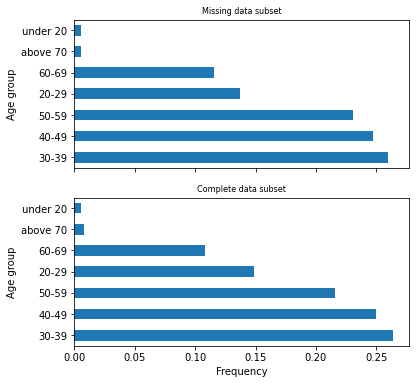

In [177]:
paired_plot(df_nan, df_nn, 'age_group7', 'Age group')

One can see that the "missing" data subset has slightly lower share of customers aged 20 to 29 and slightly higher share of customers aged 50-59, while other age groups have very similar frequencies. Let's investigate a bit further and redifine our `age_group` function for broader age groups.

In [178]:
def age_group5(age):
    """
    The function returns one of the following 5 age groups according to the age value, using the following rules:
    —'under 25' for age < 25
    —'25-39' for 25 <= age <= 39
    —'40-54' for 40 <= age <= 54
    —'55-69' for 55 <= age <= 69
    —'above 70' for all other cases
    """
    
    if age < 25:
        return 'under 25'
    elif age <= 39:
        return '25-39'
    elif age <= 54:
        return '40-54'
    elif age <= 69:
        return '55-69'
    return 'above 70' 

Now we will add another column for age categories, `age_group5`, redefine the subsets, and compare the value distributions once again.

In [179]:
df['age_group5'] = df['dob_years'].apply(age_group5)

In [180]:
df_nan = df[df['days_employed'].isna()]
df_nan.head(1)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group7,age_group5
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding,60-69,55-69


In [181]:
df_nn = df.dropna(subset=['days_employed'])
df_nn.head(1)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group7,age_group5
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,40-49,40-54


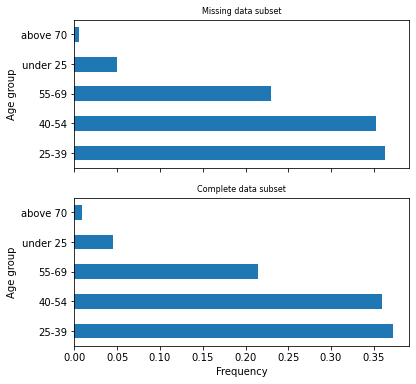

In [182]:
paired_plot(df_nan, df_nn, 'age_group5', 'Age group')

For this version of the `age_group` function we see even less obvious difference in frequencies: again, less customers aged 25 to 39 and a bit more customers aged 55 to 69 for the "missing" data subset.

By comparing the last two results, we can derive that actual age groups where the difference might be are 25 to 29 and 55 to 59. Let's use our `pair_plot` function to zoom in into this age subgroups.

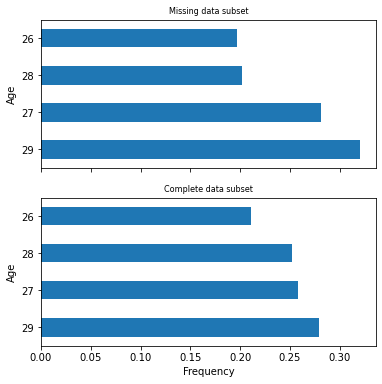

In [183]:
# for ages 25 to 29
paired_plot(df_nan[(df_nan['dob_years']>25) & (df_nan['dob_years']<=29)],
            df_nn[(df_nn['dob_years']>25) & (df_nn['dob_years']<=29)], 'dob_years', 'Age')

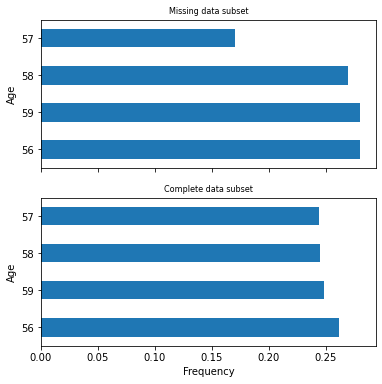

In [184]:
# for ages 55 to 59
paired_plot(df_nan[(df_nan['dob_years']>55) & (df_nan['dob_years']<=59)],
            df_nn[(df_nn['dob_years']>55) & (df_nn['dob_years']<=59)], 'dob_years', 'Age')

[Back to Contents](#back)

### Task 4. Intermediate conclusions on the nature of missing values <a id='missing_values_intermediate2'></a>

We have found that the main differences are for ages 57, 28, and 29, which seems to be lacking any specific pattern; thus the `dob_years` variable does not explain the missing values. To finally confirm that the missing values are accidental, we complete our investigatiion with zooming into the `purpose` variable.

[Back to Contents](#back)

### Task 5. Further investigation of missing values: the role of loan purpose  <a id='missing_values_part3'></a>

Now we will take a deeper look at the categories of the `purpose` variable. Let's start from listing them.

In [185]:
df['purpose'].value_counts()

wedding ceremony                            797
having a wedding                            777
to have a wedding                           774
real estate transactions                    676
buy commercial real estate                  664
buying property for renting out             653
housing transactions                        653
transactions with commercial real estate    651
purchase of the house                       647
housing                                     647
purchase of the house for my family         641
construction of own property                635
property                                    634
transactions with my real estate            630
building a real estate                      626
buy real estate                             624
building a property                         620
purchase of my own house                    620
housing renovation                          612
buy residential real estate                 607
buying my own car                       

One can see that there are recurring categories of the same or similar meaning: e.g., 'wedding ceremony', 'having a wedding', 'to have a wedding', etc. Thus, we have no choice rather then to study this list and to come up with new, more general categories (category groups). We will use those general categories to define a new function, `purpose_group()`, and add corresponding column to our initial dataframe.

In [186]:
def purpose_group(purpose):
    """
    The function returns one of the following general loan purpose groups according, using the following rules:
    —'wedding' for 'wedding ceremony'|'having a wedding'|'to have a wedding'
    —'commercial real estate' for 'buy commercial real estate'|'buying property for renting out'|'transactions with commercial real estate'
    —'own housing' for 'housing transactions'|'purchase of the house'|'housing'|'purchase of the house for my family'|'construction of own property'|'purchase of my own house'|'housing renovation'
    —'real estate general' for 'real estate transactions'|'property'|'transactions with my real estate'|'building a real estate'|'buy real estate'|'building a property'|'buy residential real estate'
    —'car' for 'buying my own car'|'car'|'second-hand car purchase'|'to own a car'|'buying a second-hand car'|'cars'|'to buy a car'|'car purchase'|'purchase of a car'
    —'education' for 'going to university'|'supplementary education'|'university education'|'education'|'to get a supplementary education'|'getting an education'|'profile education'|'getting higher education'|'to become educated'
    """
    
    if purpose in ('wedding ceremony','having a wedding','to have a wedding'):
        return 'wedding'
    elif purpose in ('buy commercial real estate','buying property for renting out','transactions with commercial real estate'):
        return 'commercial real estate'
    elif purpose in ('housing transactions','purchase of the house','housing','purchase of the house for my family','construction of own property','purchase of my own house','housing renovation'):
        return 'own housing'
    elif purpose in ('real estate transactions','property','transactions with my real estate','building a real estate','buy real estate','building a property','buy residential real estate'):
        return 'real estate general'
    elif purpose in ('buying my own car','car','second-hand car purchase','to own a car','buying a second-hand car','cars','to buy a car','car purchase','purchase of a car'):
        return 'car'
    return 'education' 



In [187]:
#Adding the purpose group column to the initial DataFrame and checking that no category was left out.
df['purpose_group'] = df['purpose'].apply(purpose_group)
df['purpose_group'].value_counts(dropna=False)

own housing               4455
real estate general       4417
car                       4315
education                 4022
wedding                   2348
commercial real estate    1968
Name: purpose_group, dtype: int64

Now we should recalculate our subsets:

In [188]:
df_nan = df[df['days_employed'].isna()]
df_nan.head(1)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group7,age_group5,purpose_group
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding,60-69,55-69,wedding


In [189]:
df_nn = df.dropna(subset=['days_employed'])
df_nn.head(1)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group7,age_group5,purpose_group
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,40-49,40-54,own housing


Finally, we can check what are the distributions of the `purpose_group` variable for the two subsets.

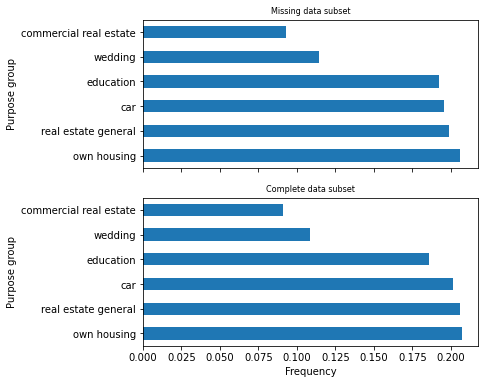

In [190]:
paired_plot(df_nan, df_nn, 'purpose_group', 'Purpose group')

We see small differences in the frequencies for 'education', 'car', and 'real estate general' with slightly more cases of educational purpose rather than purchasing car or some real estate. To erase every concern, let's perform a check of statistical significance of the difference between these two distributions. To this purpose, first, we merge the two distributions into one DataFrame.

In [191]:
merged = pd.merge(
    df_nan.purpose_group.value_counts(normalize = True).to_frame(),
    df_nn.purpose_group.value_counts(normalize = True).to_frame(),
    left_index=True,
    right_index=True)

merged

,purpose_group_x,purpose_group_y
own housing,0.206072,0.207069
real estate general,0.198712,0.205933
education,0.195492,0.185882
car,0.192272,0.201385
wedding,0.114535,0.108470
commercial real estate,0.092916,0.091261


Second, we will apply the two-sided Kolmogorov-Smirnov test to test whether the two underlying one-dimensional probability distributions differ. That means, we will answer the question: "What is the probability that these two sets of samples were drawn from the same probability distribution?"

In [192]:
stats.ks_2samp(merged.purpose_group_x, merged.purpose_group_y)

KstestResult(statistic=0.3333333333333333, pvalue=0.9307359307359307)

The resulting p-value is ~0.93, thus we cannot reject the hypothesis that the two samples (data subsets) were drawn from the same probability distribution.

Summarizing the invistigation conducted in Task 1 to Task 5 of Stage 2, where we compare the value distributions of each variable for two subsets of the initial data, the one where the values for `days_employed` and `total_income` are both missing and the second one with complete set of data, we did not find any specific pattern which could explain the missing values.

[Back to Contents](#back)

### Task 6. Final conclusions on the nature of missing values <a id='missing_values_final'></a>
We can finally conclude:
- there is a subset of 2174 entries which lack the values in `days_employed` and `total_income` columns (please see [Data Exploration](#data_overview_exploration) task for a detailed step-by-step-explanation of how we got to conclude this);
- missing values are random (see above); thus, possible reasons for their appearance can be technical issues during data entry or, later on, during data retrival from the bank's database, like incorrect SQL query. This would be my first assumtion to address to the loan division. Deeper in, lack of integrety in the bank's database can be also turn to be the case. Theoretically, this may result in a situation when, for the rest of the columns, some entries from the subset with NaN values can match entries from the data subset with complete set of values. Unfortunately, we were not provided with unique identifiers for the customer entries and, while the columns with complete data (`children`, `dob_years`, `education`, `family_status`, `gender`, `income_type`, `debt`, and `purpose`) cannot define a customer specifically enough (there can and even should be people with identical profiles, otherwise there would be no sense to build a scoring model), we will have to assume that those are unique customers for whom `days_employed` and `total_income` values are missing.

We will continue in the following order:
1. We check for duplicates in individual columns, explicit or implicit, including different registers, and fix them when required;
2. In addition, we check for duplicate entries across the whole subset for which the data is complete, assuming that, with given precision, the probability of having two customers with the same values of `days_employed` and `total_income` is zero;
3. Then we will have to make additional investigation on the values in `days_employed` and `total_income` columns, to clean incorrect artifacts before we can fill in the missing information;
4. Then we will get back to the missing values and fill them in;
5. Finally, if not accompliched before, we will fimalize data categorization to support the further hypotheses testing.

[Back to Contents](#back)

### Task 7. Working with duplicates in individual columns <a id='duplicates1'></a>

During the [initial research on the missing values](#missing_values), we have seen that there were two columns with duplicate name values in our dataset, `education` and `purpose`. We have treated the latter by grouping purposes into groups and adding correposnding column; thus, the only column we have to "clean" now is `education`.

To speed up working with it, we will extract this column, together with its IDs column into separate DataFrame. Thus, in a concise manner, we will see the implicit duplicates and any inconsistencies in segmentation, test our approach to eliminating them and then apply it to the initial dataset.

In [193]:
# Find the dictionary
education_dict = pd.DataFrame(columns = ['education', 'education_id'], data = df[['education', 'education_id']].values)
education_dict = education_dict.drop_duplicates().reset_index(drop = True)

Now let's look at `education_dict`.

In [194]:
# Checking for duplicates in education_dict
education_dict.sort_values(by=['education_id'])

,education,education_id
0,bachelor's degree,0
4,BACHELOR'S DEGREE,0
7,Bachelor's Degree,0
1,secondary education,1
2,Secondary Education,1
3,SECONDARY EDUCATION,1
5,some college,2
8,SOME COLLEGE,2
9,Some College,2
6,primary education,3


We have assumed before and now can see, that we indeed have 5 categories of education with 3 name options for each of it. It seems like the only difference between them is different registers, while the indices are correctly assigned; therefore, we will make them lowercase using the str.lower() method, drop duplicates once again and check whether it solves the issue.

In [195]:
# Address the duplicates in education_dict
education_dict['education'] = education_dict['education'].str.lower()
education_dict = education_dict.drop_duplicates().reset_index(drop = True)
education_dict.sort_values(by=['education_id'])

,education,education_id
0,bachelor's degree,0
1,secondary education,1
2,some college,2
3,primary education,3
4,graduate degree,4


Making all the `education` categories lowercase clears the dictionary; thus, by applying the same approach to the initial dataset will resolve the implicite duplicate names issue for the `education` variable.

In [196]:
# Address the duplicates in df
df['education'] = df['education'].str.lower()

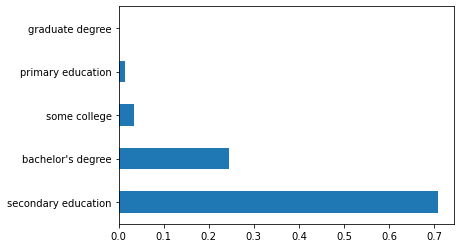

In [197]:
# Check whether we have any duplicates left in the `education` column of the initial dataset
df['education'].value_counts(normalize=True).plot(kind = 'barh') 
plt.show()

Everything is fine with this column now. Let's make only a quick check on `family_status` and `family_status_id` to confirm that there are no inconsistencies between the value and ID assignment.

In [198]:
fs_d = pd.DataFrame(columns = ['family_status', 'family_status_id'], data = df[['family_status', 'family_status_id']].values)
fs_d = fs_d.drop_duplicates().reset_index(drop = True)
fs_d.sort_values(by=['family_status_id'])

,family_status,family_status_id
0,married,0
1,civil partnership,1
2,widow / widower,2
3,divorced,3
4,unmarried,4


There are no inconsistencies with `family_status` values and IDs. Now, when everything seems to be fine with individual columns, now we proceed to checking for duplicates across the dataset.

[Back to Contents](#back)

### Task 8. Working with duplicates across the dataset <a id='duplicates2'></a>

As mentioned above, we need to make sure that at least or subset with the complete set of values does not have duplicates. Let's us update it and apply the `drop_duplicates()` method.

In [199]:
df_nn = df.dropna(subset=['days_employed'])
# check once again that the initial length remained the same
len(df_nn)

19351

In [200]:
# apply the drop_duplicates() method and check again the size of the subset
df_nn = df_nn.drop_duplicates()
len(df_nn)

19351

Thus, we can see that there were no duplicate entries for the subset with complete data (even after cleaning implicit duplicates in the `education` column). Let's make a final check that there are no duplicate issues behind the variability of categories in the `purpose` column.

In [201]:
# define a list of columns we aim to check duplicates on
dup_check_nn = ['children','days_employed', 'dob_years', 'education', 'family_status', 'gender', 'income_type', 'total_income', 'debt']
df_nn_dup = df_nn[df_nn.duplicated(dup_check_nn)]
len(df_nn_dup)

0

We can finally conclude that there are no duplicate entries in the "complete" data subset.

In our [final thoughts on the nature of the missing values](#missing_values_final) in our dataset, we have already elaborated on the fact that we will have to relate to the whole "missing" data subset as a set of unique entries. Nevertheless, and out of curiousity, let's check how many "potential" duplicates we have in this subset when we consider the rest of available columns, those with complete data. 

In [202]:
# initial set of variables with missing data data
df_nan = df[df['days_employed'].isna()]
len(df_nan)

2174

In [203]:
# define a list of columns we aim to check duplicates on
dup_check_nan = ['children', 'dob_years', 'education', 'family_status', 'gender', 'income_type', 'debt', 'purpose']
# define "potential" duplicates subset
df_nan_dup = df_nan[df_nan.duplicated(dup_check_nan)]
# check the number of entries in the "@"potential" duplicates subset
len(df_nan_dup)

71

In [204]:
# let's see how many unique entries the "potential" duplicates subset has
len(df_nan_dup.drop_duplicates())

66

Thus, we have 71 (around 0.3% of all entries in the initial dataset) combinations of values across the all the parameters, besides the missing values for `days_employed` and `total_missing` variables with "duplicate" entries, 66 of them unique. When we use the `purpose_group` variable instead of `purpose`, the number of such "twins" grows three times and account for about 1.3% of all entries in the initial dataset:

In [205]:
# initial set of variables with full data with 'purpose_group' instead `purpose`
dup_check_nan = ['children', 'dob_years', 'education', 'family_status', 'gender', 'income_type', 'debt', 'purpose_group']
df_nan_dup = df_nan[df_nan.duplicated(dup_check_nan)]
len(df_nan_dup)

276

In [206]:
len(df_nan_dup.drop_duplicates())

260

Interestingly, the share of the "twins", i.e. entries with duplicate combinations of values across all the parameters, besides `days_employed` and `total_income` variables, in the "complete" data subset is appr. 15.5%.

In [207]:
# define a list of columns we aim to check duplicates on
dup_check_nn = ['children', 'dob_years', 'education', 'family_status', 'gender', 'income_type', 'debt', 'purpose']
df_nn_dup = df_nn[df_nn.duplicated(dup_check_nn)]
len(df_nn_dup)/len(df_nn)

0.15544416309234665

[Back to Contents](#back)

### Task 9. Intermediate conclusions on duplicates  <a id='duplicates_intermediate'></a>

During the [initial research on the missing values](#missing_values), we have seen that there were two columns with similar values in our dataset, `education` and `purpose`. The latter one we have treated by grouping purposes into groups and adding correposnding colum; to treat the former one, we have applied str.lower() method to the column. Across the variables we did not find duplicate values for the subset for which there are no missing values, and eleborated on the fact that we cannot drop seemingly duplicate entries, since one cannot extract enough information from the given parameters, to conclude that they belong to the same customer. The opposite is true, it follows [from the previous part](#duplicates2), that we should assume those entries to actually belong to different customers.


[Back to Contents](#back)

### Task 10. Restoring missing values in `total_income` <a id='restoring_missing_values1'></a>



To restore the missing values in total_income we will analyze the income distribution in our "complete' data subset and we will do this for age groups (which we have [already constructed](#missing_values_part2)), gender, and education (which we have [fixed](#duplicates1)), drawing upon the already common knowledge that those are the variables having the most impact on the income level: years of education are thought to have positive impact, women are still paid less, even in high-tech, and there are different periods of life when people can have more income or less, depending in which period they find themselves. We will check our assumtion that the median will comprise a better indicator for `total_income` than the mean (income typically has more issues with outliers). Then, we will extract median `total_income` values for each of the resulting sub-categories (we will use the more granular age group, `age_group7`, for more accurate estimation). Then, we will replace missing values with the mean or median using the fillna() method.


Let's recap on the table that only has data without missing values.

In [208]:
# Create a table without missing values and print a few of its rows to make sure it looks fine
df_nn = df.dropna(subset=['days_employed'])
# check once again that the initial length remained the same
len(df_nn)

19351

Let's check the mean and the median values of `total_income` for the whole subset.

In [209]:
# Look at the mean values for income based on your identified factors
col = 'total_income'
f1 = 'mean'
f2 = 'median'
income_stat= df_nn.agg({col:[f1, f2]})
income_stat

,total_income
mean,26787.568355
median,23202.870000


In [210]:
# calculate the share of difference
((income_stat[col][f1]-income_stat[col][f2])/(income_stat[col][f2]))//0.0001/100

15.44

The difference is above 15%; thus, we can conclude that there are plenty of outliers and using the median will be a better option.

Let's make a quick statistical check to be sure that there are no unaccounted artefacts in the distribution of the `total_income` variable:

In [211]:
df['total_income'].describe()

count     19351.000000
mean      26787.568355
std       16475.450632
min        3306.762000
25%       16488.504500
50%       23202.870000
75%       32549.611000
max      362496.645000
Name: total_income, dtype: float64

To get some sense of the numbers for specific sub-groups, let's calculate the median values of total_income for 20 to 29 age group over all education categories and gender:

In [212]:
# getting a DataFrame of median values for the age group 20-29
# we avoid setting multi-index by passing “as_index=False” to the groupby operation
median_20_29 = pd.DataFrame(df_nn[df_nn['age_group7']=='20-29'].sort_values(by='age_group7').groupby(['education', 'gender'], as_index=False)['total_income'].agg('median'))
median_20_29

,education,gender,total_income
0,bachelor's degree,F,23481.1275
1,bachelor's degree,M,30717.2190
2,primary education,F,17781.3660
3,primary education,M,27933.8285
4,secondary education,F,18130.7060
5,secondary education,M,24662.6090
6,some college,F,19925.4750
7,some college,M,26768.9325
8,some college,XNA,32624.8250


Let's retrieve specific median total income value, for example for the sub-group of women with primary education (aged 20 to 29 in our example):

In [213]:
median_20_29[(median_20_29['education']=='primary education') & (median_20_29['gender'] == 'F')]['total_income']

2    17781.366
Name: total_income, dtype: float64

In this way, we are able to match between a sub-group and an aggregate stats function value for this sub-group. As a side note, we see a tremendous difference in the income levels for women and men.

Based on the example above, we will define a function, called `sub_group_stat`, which will filter sub-groups of interest from the subset without missing data, calculate the values of an aggregate stats function (median value in our case) on particular column, `total_income` in our case, and fill in the missing values for the same sub-groups in the initial dataset with corresponding aggregated values.

In [214]:
"""
The sub_group_stat() function filters a sub-group from the subset without missing data,
calculates the median value for particular numeric column, `total_income` in our case,
and replaces the missing values for the same sub-group in the initial dataset with this median value.

The function takes 4 position paramaters:
 - df - the DataFrame of interest, DataFrame;
 - group_list - list of columns for grouping, for example:
         ['education','gender','age_group7'];
 - column - the column for which the stats function should be calculates, str;
 - func - the requested stats function, str.
 
The function returns two DataFrames:
 - initial dataset with restored values for column;
 - func_df - a DataFrame with func values for every sub-group.

Example of func_df DataFrame: median_df output for group_list = ['education', 'gender', 'age_group7']:
        education 	gender 	age_group7 	total_income
    0 	bachelor's degree 	F 	20-29 	23481.1275
    1 	bachelor's degree 	F 	30-39 	26205.4365
    2 	bachelor's degree 	F 	40-49 	27616.3670
    3 	bachelor's degree 	F 	50-59 	27112.8490
    4 	bachelor's degree 	F 	60-69 	24754.4010
    ...

"""

def sub_group_stat(df, group_list, column, func):
    import pandas as pd
    
    # the subset without NaNs in column
    df_nn = df.dropna(subset=[column])
    # number of columns to group by
    gl = len(group_list)
    
    # calculate a DataFrame with func values for every sub-group
    # consists of Series on columns from group_list + the resulting column after applying func on column
    func_df = pd.DataFrame(df_nn.groupby(group_list, as_index=False)[column].agg(func))
   
        
    # for each row of func_df, the DataFrame with sub-groups and func values for every sub-group
    # e.g. ["bachelor's degree", 'F', '20-29', 23481.1275]
    for i in range(0,len(func_df)):
        #the starting subset of all entries with missing values in column
        filtered_df = df[df[column].isna()]
        # filter entries with the same set of parameters as in the current sub-group i
        for j in range(0,gl):
            filter_val = func_df.iloc[i].to_list()[j]
            filtered_df = filtered_df[filtered_df[group_list[j]]==filter_val] # first three el's of the row i list
        # fill in missing values with the func column value for the current sub-group i
        filtered_df[column] = filtered_df[column].fillna(func_df.iloc[i].to_list()[-1]) #the last el of the row i list
        # append the resulting DataFrame to the intial subset without NaNs
        df_nn = df_nn.append(filtered_df, ignore_index=True)
    
    # currently df_nn has all the missing values (for column variable) filled in
    return df_nn,func_df

Now we can apply the `sub_group_stat()` function for the `total_income` column.

In [215]:
# the list of columns to group by
group_list = ['education','gender','age_group7']
column = 'total_income'
func = 'median'

# we create a new DataFrame to not interfere with the initial dataset
df_full_income,func_df = sub_group_stat(df, group_list,column,func)

Now we can check whether there are missing values left in the `total_income` column:

In [216]:
df_full_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
 12  age_group7        21525 non-null  object 
 13  age_group5        21525 non-null  object 
 14  purpose_group     21525 non-null  object 
dtypes: float64(2), int64(5), object(8)
memory usage: 2.5+ MB


The total number of values in the `total_income` column matches the number of values in other columns, i.e. all missing values in total_income are restored.

N.B. We can even print out and see how `func_df` looks for the above set of parameters.

In [217]:
func_df

,education,gender,age_group7,total_income
0,bachelor's degree,F,20-29,23481.1275
1,bachelor's degree,F,30-39,26205.4365
2,bachelor's degree,F,40-49,27616.3670
3,bachelor's degree,F,50-59,27112.8490
4,bachelor's degree,F,60-69,24754.4010
...,...,...,...,...
56,some college,M,50-59,29405.0380
57,some college,M,60-69,32316.3535
58,some college,M,above 70,19946.7950
59,some college,M,under 20,27773.5020


[Back to Contents](#back)

###  Task 11. Restoring values in `days_employed` <a id='restoring_missing_values2'></a>

In general, to restore the missing values in `days_employed` we will analyze the distribution for our "complete' data subset and we will do this while taking into account age groups (which we have [already constructed](#missing_values_part2)), gender, family status, and children. Similarly to the case of `total_income`, we are drawing upon the already common knowledge that these are the variables having the most impact on the employement status: women have still to spend more time at home with children, married women can have more confidence in their financial future, and thus, work less, and there are different periods of life when people can have more incentives to work or less, depending in which period they find themselves. We will still employ the median as a better alternative to the mean, since naturally there should be high variance in the number of days employed. We should extract median `days_employed` values for each of the resulting sub-categories and then replace missing values with the median using the fillna() method.


Nevertheless, from the [prior investigation](#data_overview_exploration), we know that there are some issues with the values in this column. Thus, we would better start by taking a look at the basic stats:

In [218]:
df['days_employed'].describe()

count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64

The stats are a kind of unexpected for a variable which meaning is days of experience. Let's take a closer look at the distribution:

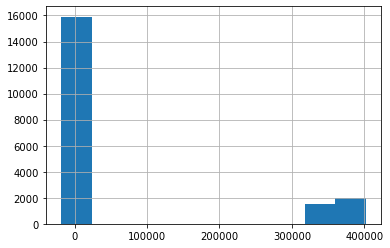

In [219]:
ax = df['days_employed'].hist()

We can see that there is a subset of exaggerated values, above 300000 of the days of work experience, and another subset of more reasonable values. Let's make a zoom in into both of these subsets.

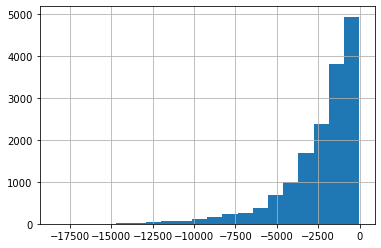

In [220]:
ax = df[df['days_employed']<100000]['days_employed'].hist(bins = 20)

In [221]:
df[df['days_employed']<100000]['days_employed'].describe()

count    15906.000000
mean     -2353.015932
std       2304.243851
min     -18388.949901
25%      -3157.480084
50%      -1630.019381
75%       -756.371964
max        -24.141633
Name: days_employed, dtype: float64

We can see that this subset includes 15906 data points (appr. 82%) and has a realistic distribution, though all these values are below zero, while the maximum absolute value (see the stats above) is 18389 days, which means ~50 years of experience. The reason for negative values can be just the opposite direction of the substraction, start day minus reference date instead theother way around.

Now, to the second subset.

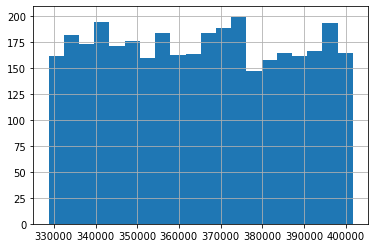

In [222]:
ax = df[df['days_employed']>=100000]['days_employed'].hist(bins = 20)

In [223]:
df[df['days_employed']>=100000]['days_employed'].describe()

count      3445.000000
mean     365004.309916
std       21075.016396
min      328728.720605
25%      346639.413916
50%      365213.306266
75%      383246.444219
max      401755.400475
Name: days_employed, dtype: float64

This subset has some kind of uniform distribution with the range between appr. 328728 and 401755 days (?).

Let's take a quick look at the distributions of other variables for these two subsets:

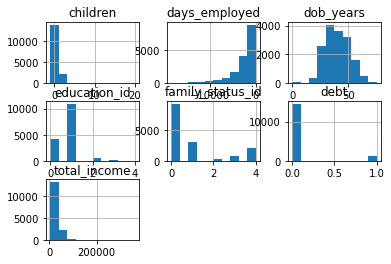

In [224]:
ax = df[df['days_employed']<100000].hist()

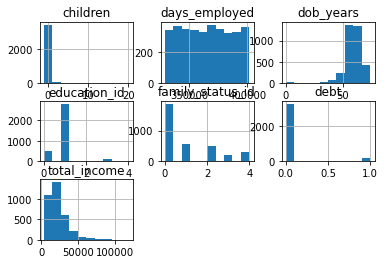

In [225]:
ax = df[df['days_employed']>=100000].hist()

There is some significant difference in the distribution of ages for these two subsets. Let's take a look specifically at the `income_type` variable, which we do not see among the generic histograms prinout, probably due to long names of the categories.

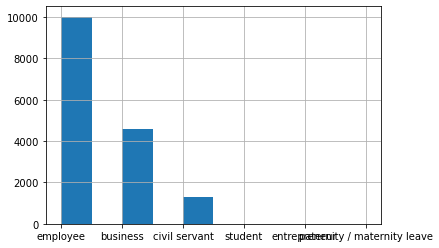

In [226]:
ax = df[df['days_employed']<100000]['income_type'].hist()

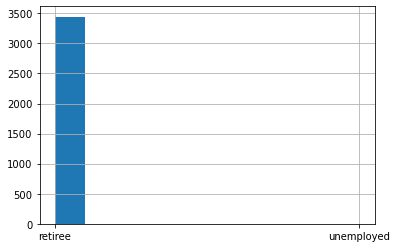

In [227]:
ax = df[df['days_employed']>=100000]['income_type'].hist()

Now we see that the whole subset of strange day of experience values is about retiree customers, while the "regular" subset does not have retiree customers at all. We still do not have any ideas of how the days of experiance have turned into eternity, but at least technically we can employ this finding for filling in missing values, namely we should add the `income_type` variable to the list of columns to group by when applying the already built function for calculating aggregate stats function values for customized customer sub-groups. <a id='income_type_rename'></a> But before we proceed, we should check the `income_type` column for any issues.

The values for it are as follows:

In [228]:
df_full_income['income_type'].value_counts()

employee                       11119
business                        5085
retiree                         3856
civil servant                   1459
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

There is one category that we can definitely change and add to another category, entrepreneur, regarding the rest we should consult the loan division.

In [229]:
# replace entreprenuer category with business category in the `income_type` column
df_full_income['income_type'] = df_full_income['income_type'].replace(to_replace='entrepreneur', value='business')

In [230]:
# Check the result - make sure it's fixed
df_full_income['income_type'].value_counts()

employee                       11119
business                        5087
retiree                         3856
civil servant                   1459
unemployed                         2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

Let's update the `group_list` parameter apply the function to the `days_employed` column and check whether all the missing values are restored.

In [231]:
# the list of columns to group by
group_list = ['children','family_status','gender','income_type','age_group7']
column = 'days_employed'
func = 'median'

# a new DataFrame on top of the previously created dataset with restored total_income values
df_full_days_empl,func_df = sub_group_stat(df_full_income, group_list,column,func)

In [232]:
df_full_days_empl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21501 entries, 0 to 21500
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21501 non-null  int64  
 1   days_employed     21501 non-null  float64
 2   dob_years         21501 non-null  int64  
 3   education         21501 non-null  object 
 4   education_id      21501 non-null  int64  
 5   family_status     21501 non-null  object 
 6   family_status_id  21501 non-null  int64  
 7   gender            21501 non-null  object 
 8   income_type       21501 non-null  object 
 9   debt              21501 non-null  int64  
 10  total_income      21501 non-null  float64
 11  purpose           21501 non-null  object 
 12  age_group7        21501 non-null  object 
 13  age_group5        21501 non-null  object 
 14  purpose_group     21501 non-null  object 
dtypes: float64(2), int64(5), object(8)
memory usage: 2.5+ MB


The total number of entries in the resulting DataFrame is less then it should be. Given the way the applied `sub_group_stat()` function works, the reason is that not for every sub-group in the "missing" data subsets there is corresponding sub-group in the "complete" data subset based on which the median is supposed to be calculated. In this particular case, we do not have `days_employed` filling values for some entries of the initial dataset.

 <a id='children_bool'></a>
 
To try to fix it, we can assume that the high granularity of calculations results in such an outcome, but grouping by less columns, e.g. leaving out 'children' or/and 'family_status', while being reasonable from the statistical point of view, does not result in complete coverage either. Alternatively, we can limit the number of categories in the `children` variable up to boolean value (either "have children" or "do not have children"). Let's check it out.


We will define a categorization function called `children_group()` which will exhibit the already mentioned above behaviour.

A note on the `children` column: we have seen that there values like -1 (47 entries) and 20 (76 entries) in this column, less than 0.5% of the total number of entries. We will assume that `-1` means no children, as it often happens with positive value variables. We cannot do anything about 20 children, but we will assume that means that the customer indeed has children.

In [233]:
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [234]:
def children_group(children):
    """
    The function returns one of the two groups, using the following rules:
    —'children' for children > 0
    —'no children' for children <= 0
    """
    
    if children <= 0: #we assume that `-1` value means no children, as it often happens.
        return 'no children'
    return 'children' 

In [235]:
#Adding the children group column to df_full_income DataFrame and checking that no category was left out.
df_full_income['children_group'] = df_full_income['children'].apply(children_group)
df_full_income['children_group'].value_counts(dropna=False)

no children    14196
children        7329
Name: children_group, dtype: int64

Now, let's give another try to our missing value filling function:

In [236]:
# the list of columns to group by
group_list = ['children_group','family_status','gender','income_type','age_group7']
column = 'days_employed'
func = 'median'

# a new DataFrame on top of the previously created dataset with restored total_income values
df_full_days_empl,func_df = sub_group_stat(df_full_income, group_list,column,func)

In [237]:
df_full_days_empl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21517 entries, 0 to 21516
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21517 non-null  int64  
 1   days_employed     21517 non-null  float64
 2   dob_years         21517 non-null  int64  
 3   education         21517 non-null  object 
 4   education_id      21517 non-null  int64  
 5   family_status     21517 non-null  object 
 6   family_status_id  21517 non-null  int64  
 7   gender            21517 non-null  object 
 8   income_type       21517 non-null  object 
 9   debt              21517 non-null  int64  
 10  total_income      21517 non-null  float64
 11  purpose           21517 non-null  object 
 12  age_group7        21517 non-null  object 
 13  age_group5        21517 non-null  object 
 14  purpose_group     21517 non-null  object 
 15  children_group    21517 non-null  object 
dtypes: float64(2), int64(5), object(9)
memor

Some progress, but still 8 entries with missing values have been dropped. We can try to leave out grouping by family status, if we find that `children_group` and `gender` variables comprise together a sufficient proxy to the need to be more time at home with children:

In [238]:
# the list of columns to group by
group_list = ['children_group','gender','income_type','age_group7']
column = 'days_employed'
func = 'median'

# a new DataFrame on top of the previously created dataset with restored total_income values
df_full,func_df = sub_group_stat(df_full_income, group_list,column,func)

In [239]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
 12  age_group7        21525 non-null  object 
 13  age_group5        21525 non-null  object 
 14  purpose_group     21525 non-null  object 
 15  children_group    21525 non-null  object 
dtypes: float64(2), int64(5), object(9)
memor

Now we have no entreies with missing values dropped, while coming up with the idea of children presence categorization on the fly.

In [240]:
df_full.head(1)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group7,age_group5,purpose_group,children_group
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,40-49,40-54,own housing,children


Back to the issues with the `days_employed` column. There is no obvious solution to both of the issues raised. We would definitely have a conversation about it with the loan division: first, to check that our hypothesis about the opposite direction of substitution is correct; second, to get more clues about the retirees and the mean value of 365000 days for `days_employed` variable item. So far, we have restored the missing values based on the existing pattern, we can fix the values alltogether when we come up with a better solution.

[Back to Contents](#back)

###  Task 12. Final check for missing values for the rest of the variables <a id='restoring_missing_values3'></a>

Let's take additional look at the client's age once again. We remember that there was one issue with regard to this variable, namely zero values in 101 rows.

In [241]:
df_full[df_full['dob_years']<20]['dob_years'].value_counts()

0     101
19     14
Name: dob_years, dtype: int64

Here we see 101 entries aged zero, which generally means missing value. Let's look at the distributions of other variables for these entries.

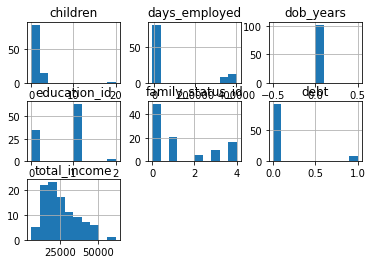

In [242]:
ax = df_full[df_full['dob_years']==0].hist()

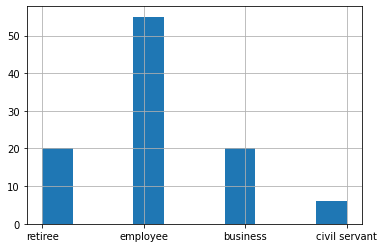

In [243]:
ax = df_full[df_full['dob_years']==0]['income_type'].hist()

Children, education, family status, debt, income type - everything looks usual, so we can substitute these nulls with median values for some sub-groups. We can apply our function, if we replace the zero values with NaNs and use `income_type`, `education` and `gender` as our proxies:

In [244]:
# Replacing zeros to Nans in the `dob_years` column to apply our missing values filling function
df_full['dob_years'].replace(0, np.nan, inplace=True)
df_full[df_full['dob_years']<20]['dob_years'].value_counts()

19.0    14
Name: dob_years, dtype: int64

In [245]:
# Apply the function and check that number of non-nulls is 21524 in each column
# the list of columns to group by
group_list = ['education','gender','income_type']
column = 'dob_years'
func = 'median'

# we create a new DataFrame to not interfere with the initial dataset
df_full,func_df = sub_group_stat(df_full, group_list,column,func)

In [246]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  float64
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
 12  age_group7        21525 non-null  object 
 13  age_group5        21525 non-null  object 
 14  purpose_group     21525 non-null  object 
 15  children_group    21525 non-null  object 
dtypes: float64(3), int64(4), object(9)
memor

We need to [reassign age groups](#missing_values_part2) now.

In [247]:
df_full['age_group7'] = df_full['dob_years'].apply(age_group7)
df_full['age_group5'] = df_full['dob_years'].apply(age_group5)

The next variable will be `family_status`. So far, we have not seen any issues with it, let's check out once again the values for the column to be on the safe side.

In [248]:
df_full['family_status'].value_counts()

married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: family_status, dtype: int64

Indeed, no issues here.

The next variable is `gender`. Let's see the values for the column.

In [249]:
df_full['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

Here we have on entry with the gender other than man or woman; however, we do not have much to do about it.

[Back to Contents](#back)

### Task 13. Categorization of data <a id='categories'></a>

So far we have fixed one categorical variable (`education`), added one for text data (`purpose_group`) and two for numerical data (`age_group` in two versions, and `children_group`), all of them to fix issues with missing values and duplicates. Now ,we need to think what additional categorical variables will be helpful in testing the hypotheses. Let's take a look at the data and review each column once again.

In [250]:
df_full.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group7,age_group5,purpose_group,children_group
0,1,-8437.673028,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,40-49,40-54,own housing,children
1,1,-4024.803754,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase,30-39,25-39,car,children
2,0,-5623.422610,33.0,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,30-39,25-39,own housing,no children
3,3,-4124.747207,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,30-39,25-39,education,children
4,0,340266.072047,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,50-59,40-54,wedding,no children


1. We added a categorical variable for boolean condition on the `children` column, to check whether "have child/en" / "does not have children" has its impact;
2. We still have to fix the `days_employed` column;
3. We already have two categorical variables for `dob_years`;
4. We have fixed duplicates in the `education` column;
5. We did not see any issues with the `family_status` column;
6. We have unidentified `gender` category in one row, but it seems to be OK;
7. We have fixed, as long as it was possible, the `income_type` categories;
8. We did not see any issues with the `debt` column;
9. We should definitely consider constructing a categorical variable for the `total_income` column;
10. We have fixed the issues with implicit duplicate names in the `purpose` column by creating the `purpose_group` variable.

Let's consider the `total_income` variable.

In [251]:
# Print the stats
df_full['total_income'].describe()

count     21525.000000
mean      26449.150381
std       15710.799535
min        3306.762000
25%       17234.278000
50%       23127.157000
75%       31577.182000
max      362496.645000
Name: total_income, dtype: float64

The minimum value is around 3000, 25% below 17000, the median is appr. 23000 and 75% are below appr. 31500. Thus, it looks like the following categories can help make the `total_income` variable "digestable":
- below 15000;
- 15000-24999;
- 25000-34999;
- 35000-44999;
- above 45000.

Let's define the `income_group` function.

In [252]:
def income_group(total_income):
    """
    The function returns one of the five groups, using the following rules:
    — 'below 15000' for total_income < 15000;
    - '15000-24999' for total_income >=15000 & <25000;
    - '25000-34999' for total_income >=25000 & <35000;
    - '35000-44999' for total_income >=35000 & <45000;
    - 'above 45000' for total_income >=45000.
    """
    
    if total_income < 15000:
        return 'below 15000'
    elif total_income < 25000:
        return '15000-24999'
    elif total_income < 35000:
        return '25000-34999'
    elif total_income < 45000:
        return '35000-44999'
    return 'above 45000' 

In [253]:
# Create `income_group` variable
df_full['income_group']=df_full['total_income'].apply(income_group)

In [254]:
# Make an estimate of the resulting distribution, note: the valueas are not sorted in the proper order
df_full['income_group'].value_counts(normalize=True)

15000-24999    0.390894
25000-34999    0.244228
below 15000    0.173937
35000-44999    0.104576
above 45000    0.086365
Name: income_group, dtype: float64

Finally, let's find some solution for the `days_employed` variable.


Just to recap, we have negatives values for every category of income_type, except 'retiree', while their absolute values seem to be reasonable. For the 'retiree' category, we have strange uniform distribution with the mean at around 365000 "days of experience". Until we have more information form the loan division, we can introduce a categorical variable which will act as follows (assuming that we only have to change the sign before the values):
- "less than 2 years" for days_employed >=0 & < 730;
- "2 - 4 years" for days_employed >=730 & < 1460;
- "4 - 7 years" for days_employed >=1460 & < 2555;
- "7 - 20 years" for days_employed >=2555 & < 7300;
- "more than 20 years" else if not retiree;
- "na" for retirees.

Let's define the `exp_group`.


In [255]:
def exp_group(days_employed):
    """
    The function returns one of the seven groups, using the following rules:
    - "less than 2 years" for days_employed >=0 & < 730;
    - "2 - 4 years" for days_employed >=730 & < 1460;
    - "4 - 7 years" for days_employed >=1460 & < 2555;
    - "7 - 20 years" for days_employed >=2555 & < 7300;
    - "more than 20 years" else if not retiree;
    - "na" for retirees.

    """
    
    if abs(days_employed) < 730:
        return 'less than 2 years'
    elif abs(days_employed) < 1460:
        return '2 - 4 years'
    elif abs(days_employed) < 2555:
        return '4 - 7 years'
    elif abs(days_employed) < 7300:
        return '7 - 20 years'
    elif abs(days_employed) < 20000:
        return 'more than 20 years'
    return 'n.a.'

In [256]:
# Create `exp_group` variable
df_full['exp_group']=df_full['days_employed'].apply(exp_group)


In [257]:
# Make an estimate of the resulting distribution, note: the valueas are not sorted in the proper order
df_full['exp_group'].value_counts(normalize=True)

7 - 20 years          0.216307
4 - 7 years           0.210499
2 - 4 years           0.179930
n.a.                  0.179233
less than 2 years     0.178862
more than 20 years    0.035168
Name: exp_group, dtype: float64

Fimally, let's print out several rows of the resulting DataFrame.

In [258]:
df_full.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group7,age_group5,purpose_group,children_group,income_group,exp_group
0,1,-8437.673028,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,40-49,40-54,own housing,children,35000-44999,more than 20 years
1,1,-4024.803754,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase,30-39,25-39,car,children,15000-24999,7 - 20 years
2,0,-5623.422610,33.0,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,30-39,25-39,own housing,no children,15000-24999,7 - 20 years
3,3,-4124.747207,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,30-39,25-39,education,children,35000-44999,7 - 20 years
4,0,340266.072047,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,50-59,40-54,wedding,no children,25000-34999,n.a.
5,0,-926.185831,27.0,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,20-29,25-39,own housing,no children,35000-44999,2 - 4 years
6,0,-2879.202052,43.0,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,40-49,40-54,own housing,no children,35000-44999,7 - 20 years
7,0,-152.779569,50.0,secondary education,1,married,0,M,employee,0,21731.829,education,50-59,40-54,education,no children,15000-24999,less than 2 years
8,2,-6929.865299,35.0,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding,30-39,25-39,wedding,children,15000-24999,7 - 20 years
9,0,-2188.756445,41.0,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,40-49,40-54,own housing,no children,15000-24999,4 - 7 years


[Back to Contents](#back)

## Stage 3. Testing the Hypotheses <a id='hypotheses_testing'></a> 

In what follows we employ basic methods of search for correlations between pairs of variables. For each pair, we print out the categories of presumably explainging variable and two counters - total sum of cases where there is debt on repayment (`sum`) and the total number of cases for each category (`count`). Then we calculate the default rate by dividing the cases where there is debt by total cases. Without entering into deep investigation, we still prefere conducting a couple of statistical significance checks for selected sample means. To this purpose, we employ [Welch's t-test](https://en.wikipedia.org/wiki/Welch%27s_t-test) to test the hypothesis that two populations (category samples) have equal means. Welch's t-test is considered to be more reliable when we do not know whether the samples have equal variances and/or they have unequal sample sizes. The Python implementation of this test is `scipy.stats.ttest_ind()` function.

[Back to Contents](#back)

To make it easier to draw conclusions with regard to the impact of different variables, we introduce a dictionary for documenting the hypotheses testing results:

In [259]:
ht_results = {}

**Hypothesis 1. Is there a correlation between family status and paying back on time?** <a id='hypotheses_testing_family'></a> 

In [260]:
# Check the family status data and paying back on time
df_full.groupby(['family_status']).agg({'debt': ['sum', 'count']})

debt       
                   sum  count
family_status                
civil partnership  388   4177
divorced            85   1195
married            931  12380
unmarried          274   2813
widow / widower     63    960

In [261]:
# Calculating default-rate based on family status
df_full.groupby(['family_status'])['debt'].apply(lambda x: x.sum()/x.count())

family_status
civil partnership    0.092890
divorced             0.071130
married              0.075202
unmarried            0.097405
widow / widower      0.065625
Name: debt, dtype: float64

**Hypothesis 1. Conclusion**

The default rate for unmarried customers seems to be the highest, followed by customers in civil partnership. To get some sense of statistical significance of this observation, we can run a statistical significance test for two categories, say, married vs. unmarried customers:

In [262]:
married = df_full[df_full['family_status']=='married']
unmarried = df_full[df_full['family_status']=='unmarried']

ht_results['family_status'] = stats.ttest_ind(married['debt'], unmarried['debt'], equal_var=False)
ht_results['family_status']

Ttest_indResult(statistic=-3.6559244955276133, pvalue=0.0002596481575844235)

We see that the p-value is much lower that the regular significance level 0.05; thus, we can conclude that there is statistically significant difference between default rates for unmarried and married customers. Further investigation into statistical significance of the difference between the sample means for different categories is needed to confirm its meaningfulness in for each pair.

[Back to Contents](#back)

**Hypothesis 2. Is there a correlation between having children and paying back on time?** <a id='hypotheses_testing_children'></a> 

First, we will look at the boolean category of having or not having children.

In [263]:
# Check the children data and paying back on time
df_full.groupby(['children_group']).agg({'debt': ['sum', 'count']})

debt       
                 sum  count
children_group             
children         677   7329
no children     1064  14196

In [264]:
# Calculating default-rate based on the number of children
df_full.groupby(['children_group'])['debt'].apply(lambda x: x.sum()/x.count())

children_group
children       0.092373
no children    0.074951
Name: debt, dtype: float64

Now, let's investigate into whether the number of children has its own impact.

In [265]:
# Check the number of children data and paying back on time
# Remember that we have a small number of entries with values '-1' (treated as 0 for children_group) and 20
df_full[(df_full['children']>0) & (df_full['children']<20)].groupby(['children']).agg({'debt': ['sum', 'count']})

debt      
          sum count
children           
1         444  4818
2         194  2055
3          27   330
4           4    41
5           0     9

In [266]:
# Calculating default-rate based on the number of children
df_full[(df_full['children']>0) & (df_full['children']<20)].groupby(['children'])['debt'].apply(lambda x: x.sum()/x.count())

children
1    0.092154
2    0.094404
3    0.081818
4    0.097561
5    0.000000
Name: debt, dtype: float64

**Hypothesis 2. Conclusion**

When talking about the plain fact of having children, the default rate for customers with children seems to be slightly higher than for those without children. In this case, we have only two categories; thus, only one run of the statistical significance test is needed for them:

In [267]:
children = df_full[df_full['children_group']=='children']
no_children = df_full[df_full['children_group']=='no children']

ht_results['children_group'] = stats.ttest_ind(children['debt'], no_children['debt'], equal_var=False)
ht_results['children_group']

Ttest_indResult(statistic=4.311895011589376, pvalue=1.629982553638349e-05)

In this case also, we see that the p-value is much lower that the regular significance level 0.05; thus, we can conclude that there is statistically significant difference between default rates for customers with or without children. Now let's test the significance of having different number of children. From the values on the default rates for the samples of customers with one child and two children, we can suggest that there is the difference between them is statistically insignificant; however we see that for customers with three chidren the default rate seems to be lower comapred to one, two or four children. Let's perform a Welch's t-test for the sub-groups of customers with two and three children:

In [268]:
children2 = df_full[df_full['children']==2]
children3 = df_full[df_full['children']==3]

ht_results['children'] = stats.ttest_ind(children2['debt'], children3['debt'], equal_var=False)
ht_results['children']

Ttest_indResult(statistic=0.765995286469164, pvalue=0.4440741806044214)

As we have suggested, the difference in default rates for customers two and three children turns out to be statistically insignificant; thus, we can firmly conclude that what matters is the fact of having children, not their number.

[Back to Contents](#back)

**Hypothesis 3. Is there a correlation between income level and paying back on time?** <a id='hypotheses_testing_income'></a> 

In [269]:
# Check the income level data and paying back on time
df_full.groupby(['income_group']).agg({'debt': ['sum', 'count']})

debt      
              sum count
income_group           
15000-24999   711  8414
25000-34999   440  5257
35000-44999   160  2251
above 45000   132  1859
below 15000   298  3744

In [270]:
# Calculating default-rate based on income level
df_full.groupby(['income_group'])['debt'].apply(lambda x: x.sum()/x.count())

income_group
15000-24999    0.084502
25000-34999    0.083698
35000-44999    0.071080
above 45000    0.071006
below 15000    0.079594
Name: debt, dtype: float64

**Hypothesis 3. Conclusion**

The default rate for less well-off customers (with income levels below 35000) seems to be slightly higher. Let's run a Welch's t-test for two categories: with total_income below 35000 or above 35000:

In [271]:
below35 = df_full[df_full['total_income']<35000]
above35 = df_full[df_full['total_income']>=35000]

ht_results['total_income'] = stats.ttest_ind(below35['debt'], above35['debt'], equal_var=False)
ht_results['total_income']

Ttest_indResult(statistic=2.6890106004565695, pvalue=0.007184584868676485)

We see that the p-value is much lower that the regular significance level 0.05; thus, we can conclude that there is statistically significant difference between default rates for customers with total income below 35000 and above 35000; however, further investigation into statistical significance of the difference between the sample means for different income categories is needed to confirm its meaningfulness in a more practical manner.

[Back to Contents](#back)

**Hypothesis 3*. How does the number of children affect the default rate for customers with different income levels?** <a id='hypotheses_testing_income_star'></a> 

Even that on average we cannot distinguish the impact of having different number of children, it sounds natural that there should be some impact for customers in different income groups, specifically when it is about lower income customers. Let's take additional look at sub-groups with 1 to 3 children (we have to exclude higher numbers due to insufficient size of the samples) for the first two income groups, below 25000.

In [272]:
df_full[(df_full['children']>0) & (df_full['children']<4) & (df_full['total_income']<25000)].groupby(['income_group', 'children']).agg({'debt': ['sum', 'count']})

debt      
                       sum count
income_group children           
15000-24999  1         186  1884
             2          80   783
             3           8   112
below 15000  1          71   739
             2          33   339
             3           7    48

In [273]:
df_full[(df_full['children']>0) & (df_full['children']<4) & (df_full['total_income']<25000)].groupby(['income_group', 'children'])['debt'].apply(lambda x: x.sum()/x.count())

income_group  children
15000-24999   1           0.098726
              2           0.102171
              3           0.071429
below 15000   1           0.096076
              2           0.097345
              3           0.145833
Name: debt, dtype: float64

**Hypothesis 3*. Conclusion**

The sample for customers in the 'below 15000' income group with 3 children seems to be too smal to draw cocnlusions; however, the numbers for the second income group suggest lower default rate for for customers with three children. Let's run a Welch's t-test for two categories: with two children and with three children with total_income between 15000 and 24999:

In [274]:
children2_15_25 = df_full[(df_full['children']==2) & (df_full['income_group']=='15000-24999')]
children3_15_25 = df_full[(df_full['children']==3) & (df_full['income_group']=='15000-24999')]

stats.ttest_ind(children2['debt'], children3['debt'], equal_var=False)

Ttest_indResult(statistic=0.765995286469164, pvalue=0.4440741806044214)

Still, there is no statistically significant difference between the default rates for these sub-groups as well.

**Hypothesis 4. How does credit purpose affect the default rate?** <a id='hypotheses_testing_purpose'></a> 

In [275]:
# Check the purpose data and paying back on time
df_full.groupby(['purpose_group']).agg({'debt': ['sum', 'count']})

debt      
                        sum count
purpose_group                    
car                     403  4315
commercial real estate  151  1968
education               370  4022
own housing             298  4455
real estate general     333  4417
wedding                 186  2348

In [276]:
# Calculating default-rate based on purpose data
df_full.groupby(['purpose_group'])['debt'].apply(lambda x: x.sum()/x.count())

purpose_group
car                       0.093395
commercial real estate    0.076728
education                 0.091994
own housing               0.066891
real estate general       0.075391
wedding                   0.079216
Name: debt, dtype: float64

**Hypothesis 4. Conclusion**

The default rates for educational purposes and for buying a car seem to be the highest, while for mortgages the lowest. To get some sense of statistical significance of this observation, we can run a statistical significance test for two categories, say, educational purposes vs. wedding:

In [277]:
educational = df_full[df_full['purpose_group']=='education']
wedding = df_full[df_full['purpose_group']=='wedding']

ht_results['purpose_group'] = stats.ttest_ind(educational['debt'], wedding['debt'], equal_var=False)
ht_results['purpose_group']

Ttest_indResult(statistic=1.7744692689624577, pvalue=0.07604426161580398)

This time, we see that the p-value is above the regular significance level 0.05; thus, we cannot reject the null-hypothesis that the default rates for loans for educational purposes and for having a wedding ceremony are the same. Further investigation into statistical significance of the difference between the sample means for different categories is needed to confirm (or reject) its meaningfulness in for each pair.

[Back to Contents](#back)

**Hypothesis 5. How does gender affect the default rate?** <a id='hypotheses_testing_gender'></a> 

In [278]:
# Check the gender data and paying back on time
df_full.groupby(['gender']).agg({'debt': ['sum', 'count']})

debt       
        sum  count
gender            
F       994  14236
M       747   7288
XNA       0      1

In [279]:
# Calculating default-rate based on gender data
df_full.groupby(['gender'])['debt'].apply(lambda x: x.sum()/x.count())

gender
F      0.069823
M      0.102497
XNA    0.000000
Name: debt, dtype: float64

**Hypothesis 5. Conclusion**

The default rate for men seem to be so much higher than that for women that we should have little doubts in it. Nevertheless, only a significance test can confirm our conclusion:

In [280]:
men = df_full[df_full['gender']=='M']
women = df_full[df_full['gender']=='F']

ht_results['gender'] = stats.ttest_ind(men['debt'], women['debt'], equal_var=False)
ht_results['gender']

Ttest_indResult(statistic=7.881536247526525, pvalue=3.4974766209953634e-15)

As we suggested above, the difference between the default rates for men and for women is of high statistical significance.

[Back to Contents](#back)

**Hypothesis 6. How does work experience affect the default rate?** <a id='hypotheses_testing_exp'></a> 

In [281]:
# Check the work experience data and paying back on time
df_full.groupby(['exp_group']).agg({'debt': ['sum', 'count']})

debt      
                    sum count
exp_group                    
2 - 4 years         397  3873
4 - 7 years         361  4531
7 - 20 years        305  4656
less than 2 years   431  3850
more than 20 years   30   757
n.a.                217  3858

In [282]:
# Calculating default-rate based on work experience data
df_full.groupby(['exp_group'])['debt'].apply(lambda x: x.sum()/x.count())

exp_group
2 - 4 years           0.102505
4 - 7 years           0.079673
7 - 20 years          0.065507
less than 2 years     0.111948
more than 20 years    0.039630
n.a.                  0.056247
Name: debt, dtype: float64

**Hypothesis 6. Conclusion**

The default rates for customers with less than 2 years and between 2 and 4 years of work experience seem to be much higher, while in general the default rates have a tendency to become lower with years of experience (which may be also correlated with age). The overall default rate for retirees seems to be a bit higher than for working people with more than 20 years of experience; this can be due to the fact that not all the retirees belong to higher age groups, some of them are retire in their 50th and even 40th (see the graph below). Let's test the null hypothesis that the sample mean (the default rate) for 'less than 2 years' category is the same as for '4-7 years' category.

In [283]:
less2 = df_full[df_full['exp_group']=='less than 2 years']
four2seven = df_full[df_full['exp_group']=='4 - 7 years']

ht_results['exp_group'] = stats.ttest_ind(less2['debt'], four2seven['debt'], equal_var=False)
ht_results['exp_group']

Ttest_indResult(statistic=4.979167493256393, pvalue=6.525756044560434e-07)

Indeed, the p-value is below 0.05; thus, we cannot accept the hypothesis stating that the default rates for the categories under consideration are the same. Nevertheless, further investigation into statistical significance of the difference between the sample means for different categories is needed to confirm (or reject) its meaningfulness in for each pair.

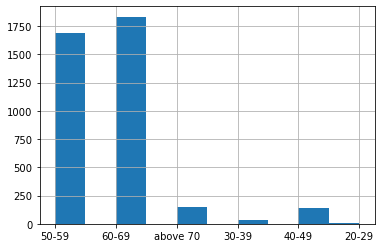

In [284]:
ax = df_full[df_full['income_type']=='retiree']['age_group7'].hist()

[Back to Contents](#back)

**Hypothesis 7. How does the level of education affect the default rate?**<a id='hypotheses_testing_eduction'></a> 

In [285]:
# Check the level of education data and paying back on time
df_full.groupby(['education']).agg({'debt': ['sum', 'count']})

debt       
                      sum  count
education                       
bachelor's degree     278   5260
graduate degree         0      6
primary education      31    282
secondary education  1364  15233
some college           68    744

In [286]:
# Calculating default-rate based on the level of education
df_full.groupby(['education'])['debt'].apply(lambda x: x.sum()/x.count())

education
bachelor's degree      0.052852
graduate degree        0.000000
primary education      0.109929
secondary education    0.089542
some college           0.091398
Name: debt, dtype: float64

**Hypothesis 7. Conclusion**

Overall default rates for customers with non-acaemic degrees seem to be much higher, while the default rate for sutomers holding a bachelor's degree is sighificantly lower. There is not enough data on customers with graduate degrees. Let's test the null hypothesis that the sample mean (the default rate) for customers with primary education is the same as for customers with some college education:

In [287]:
primary = df_full[df_full['education']=='primary education']
some = df_full[df_full['education']=='some college']

ht_results['education'] = stats.ttest_ind(primary['debt'], some['debt'], equal_var=False)
ht_results['education']

Ttest_indResult(statistic=0.8640506179296219, pvalue=0.38799900027199286)

This time, we see that the p-value is well above the regular significance level 0.05; thus, we cannot reject the null-hypothesis that the default rates for customers with these two levels of education are the same. Further investigation into statistical significance of the difference between the sample means for different categories is needed to confirm (or reject) its meaningfulness in for each pair.

[Back to Contents](#back)

**Hypothesis 8. How does age affect the default rate?** <a id='hypotheses_testing_age'></a> 

In [288]:
# Check the level of education data and paying back on time
df_full.groupby(['age_group7']).agg({'debt': ['sum', 'count']})

debt      
            sum count
age_group7           
20-29       348  3169
30-39       555  5720
40-49       408  5406
50-59       305  4679
60-69       118  2366
above 70      6   171
under 20      1    14

In [289]:
# Calculating default-rate based on the level of education
df_full.groupby(['age_group7'])['debt'].apply(lambda x: x.sum()/x.count())

age_group7
20-29       0.109814
30-39       0.097028
40-49       0.075472
50-59       0.065185
60-69       0.049873
above 70    0.035088
under 20    0.071429
Name: debt, dtype: float64

**Hypothesis 8. Conclusion**

The default rates have a general tendency to become lower with the age (note: there is not enough data to draw conclusions for customers aged below 20). Let's test the two closest age categories, '20-29' and '30-39', and then, for example, '30-39' and '40-49:

In [290]:
cat_20_29 = df_full[df_full['age_group7']=='20-29']
cat_30_39 = df_full[df_full['age_group7']=='30-39']

stats.ttest_ind(cat_20_29['debt'], cat_30_39['debt'], equal_var=False)

Ttest_indResult(statistic=1.881561119103833, pvalue=0.05994212335896676)

In [291]:
cat_40_49 = df_full[df_full['age_group7']=='40-49']

ht_results['age_group7'] = stats.ttest_ind(cat_30_39['debt'], cat_40_49['debt'], equal_var=False)
ht_results['age_group7']

Ttest_indResult(statistic=4.057180652224197, pvalue=5.000906292333654e-05)

In the first case, the null hypothesis of similar default rates for the corresponding categories cannot be rejected, while between the default rates for the customers aged 30 to 39 and for those aged 40 to 49 are significantly different. Further investigation into statistical significance of the difference between the sample means for different categories is needed to confirm (or reject) its meaningfulness in for each pair.

[Back to Contents](#back)

# Stage 4. General Conclusion: Findings and Recommendations <a id='general_conclusions'></a> 

To make the right decisions on the structure of a future credit scoring model, a bank has requested to reveal sound assumptions with regard to customers' characteristics which have the most impact on the probability of a particular customer to payout the loan. To this purpose, we formulated a number of starting hypotheses to test on the existing data provided by the loan division of the bank - after ensuring the highest possible data quality.

Based on their experience, the loan division of the bank suggested that the merital status and the number of children should have considerable impact. Thus, our initial list of hypotheses included:
1. Marital status has an impact on whether the client will default on a loan (one of the initial assumption provided by the loan division). 
2. Number of children has an impact on whether the client will default on a loan (additional assumption provided by the loan division). 
3. Other variables have impact as well.

Data on customers’ credit worthiness were provided in the file `/datasets/credit_scoring_eng.csv`. First, we have explored the quality of the data, revealed its issues are and the most appropriate ways to fix them. Then, during data preprocessing stage, we filled in the missing values, checked for duplicates and other artifacts, and categorized the data to enable further hypotheses testing.

While conducting [initial overview](#data_overview_exploration) of the data, we found that the data sample consisted of 21525 rows and 12 columns. It did not have any specific issues with column names and the data types look to be appropriate. Three significant issues with the data quality have been immediatelly revealed:
1. Negative values for days_employed variable and value(s) with what seems to be impossibly high number of days to work;
2. Implicit duplicates / variaty of options in education and purpose column;
3. 10% of the rows, which comprises a considerably large piece of data, miss values both in `days_employed` and in `total_income` columns.



[After detailed comparison of the value distributions](#missing_values) for each variable in two subsets of the initial data, the one where the values for `days_employed` and `total_income` were both missing and the second one with complete set of data, we did not find any specific pattern which could explain the missing values. Thus, we concluded that missing values were randomly missing.

Our final conclusions with regard to the missing values were as follows:
- there was a subset of 2174 entries which lack the values in `days_employed` and `total_income` columns (you can see [Data Exploration](#data_overview_exploration) task for a detailed step-by-step-explanation of how we got to conclude this);
- missing values were random (see above); possible reasons for their appearance can be technical issues during data entry or, later on, during data retrival from the bank's database, like incorrect SQL query. This would be my first assumtion to address to the loan division. Deeper in, lack of integrety in the bank's database can be also turn to be the case. Theoretically, this may result in a situation when, for the rest of the columns, some entries from the subset with NaN values can match entries from the data subset with complete set of values. Unfortunately, we were not provided with unique identifiers for the customer entries and, while the columns with complete data (`children`, `dob_years`, `education`, `family_status`, `gender`, `income_type`, `debt`, and `purpose`) cannot define a customer specifically enough (there can and even should be people with identical profiles, otherwise there would be no sense to build a scoring model), we had to assume that those are unique customers for whom `days_employed` and `total_income` values were missing.


As to duplicates, during the [initial research on the missing values](#missing_values), we have seen that there were two columns with similar values in our dataset, `education` and `purpose`. The latter one we have treated by grouping purposes into groups and adding correposnding colum; to treat the former one, we have applied str.lower() method to the column. There were minor issues with other variables, e.g. we replaced the 'entrepreneur' category of the `income_type` variable with the 'business' category, the one with more entries assigned to it. Across the variables we did not find duplicate values for the subset for which there are no missing values, and eleborated on the fact that we cannot drop seemingly duplicate entries, since one cannot extract enough information from the given parameters, to conclude that they belong to the same customer. The opposite is true, it [follows](#duplicates2) that we should assume those entries to actually belong to different customers.

[To restore values in `total_income`](#restoring_missing_values1) we analyzed the income distribution in our "complete' data subset and we will do this for age groups (which we [constructed beforehand](#missing_values_part2)), gender, and education (which we have [fixed](#duplicates1)). We drew upon the already common knowledge that those are the variables having the most impact on the income level: years of education are thought to have positive impact, women are still paid less, even in high-tech, and there are different periods of life when people can have more income or less, depending in which period they find themselves. We checked our assumtion that the median is a better indicator for `total_income` than the mean (income typically has more issues with outliers). We created special function to extract the median `total_income` values for each of the resulting sub-categories and to replace the missing values for which we used the fillna() method.

[While restoring values in `days_employed`](#restoring_missing_values2), we saw a whole subset of strange day of experience values (with the mean of 365000 days) which was entirely about retiree customers, while the "regular" subset did not have retiree customers at all. That meant that we had to add the `income_type` variable to the list of columns to group by when applying the mentione above function for calculating aggregate stats values for customized customer sub-groups. <a id='income_type_rename'></a>.

[After conducting additional check for any minor issues left](#restoring_missing_values3) for other variables, like some minor amount of entries with '-1' value for the `children` variable, we completed adding category variables and moved to hypotheses testing.

[At the hypotheses testing stage](#hypotheses_testing) we calculated the default rates for different sub-groups of cutomers and conducted a number of Welch's t-test to test selected hypotheses. Let's see the results: 

In [292]:
pd.DataFrame(ht_results) # index 0 stands for the statistic, index 1 stands for the p-value

,family_status,children_group,children,total_income,purpose_group,gender,exp_group,education,age_group7
0,-3.655924,4.311895,0.765995,2.689011,1.774469,7.881536e+00,4.979167e+00,0.864051,4.057181
1,0.000260,0.000016,0.444074,0.007185,0.076044,3.497477e-15,6.525756e-07,0.387999,0.000050


**From the table above one can conclude that the following customers' characteristics do have impact on the probability of a particular customer to payout the loan (presumably, from the highest to lowest):**
 1. [Gender](#hypotheses_testing_gender);
 2. [Working experience](#hypotheses_testing_exp);
 3. [Children (yes/no)](#hypotheses_testing_children);
 4. [Age group](#hypotheses_testing_age);
 5. [Family status](#hypotheses_testing_family);
 6. [Income level](#hypotheses_testing_income).
 
We had to reject the hypothesis of the number of children impact, which we investigated both in general and for two lowest income samples, though the fact itself of having children has tangible impact on the probability for a customer to payout the loan. The impact of the loan purpose and education level should be considered as questionable. Further investigation is needed.
 
Regarding the development of the credit score model, our recommendation so far would be to make sure that the variables mentioned above are included into the model. In addition, we could discuss with the loan division the issues around variables, like days_employed, total_income, dob_years, children, and income_type, which would hopefully result in the data of higher quality.


[Back to Contents](#back)